# Import libraries 

In [1]:
import pandas as pd  # read data and basic plots 
import numpy as np  # statistical calculations 
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# Read Dataset 

In [2]:
# read csv as dataframe  
df= pd.read_csv("E:\\Faculty\\dataset\\Salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# 1-Data Exploration

In [3]:
# Get the value counts of each column 
for i in df:
    
    print("\n ************ "+i+" ************\n")
    print("\n",df[i].value_counts())
    


 ************ Id ************


 1         1
99079     1
99099     1
99100     1
99101     1
         ..
49553     1
49554     1
49555     1
49556     1
148654    1
Name: Id, Length: 148654, dtype: int64

 ************ EmployeeName ************


 Kevin Lee                   13
Richard Lee                 11
Steven Lee                  11
William Wong                11
Stanley Lee                  9
                            ..
Jeffrey Skover               1
Ken Dever                    1
Kevin Whitfield              1
Granville McCollough III     1
Joe Lopez                    1
Name: EmployeeName, Length: 110811, dtype: int64

 ************ JobTitle ************


 Transit Operator                                  7036
Special Nurse                                     4389
Registered Nurse                                  3736
Public Svc Aide-Public Works                      2518
Police Officer 3                                  2421
                                              

In [4]:
#get information about data column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

1- It show that the columns : (Notes, Status) are all null so there is no inforamtion we will get from this columns.

2- there is some columns contain null but it's not many.

3- DataType of numerical  columns is float so that is right, String columns as Object and it is right so our dataType of our   data is good.  

In [6]:
df.shape # shape of our data

(148654, 13)

Data contain 148654 rows and 13 columns

# 2-Descriptive Statistics

In [7]:
# let's  first make function for get statistics of salaries columns

def statistics(col, data):
    print(f"Mean of {col} is: {str(data[col].mean())}")
    print(f"Median of {col} is: {str(data[col].median())}")
    print(f"Mode of {col} is: {str(data[col].mode())}")
    print(f"minimum of {col} is: {str(data[col].min())}")
    print(f"maximum of {col} is: {str(data[col].max())}")
    print(f"range of {col} is: {str(data[col].max() - data[col].min())}")
    print(f"standard deviation of {col} is: {str(data[col].std())}")


statistics("BasePay", df)

Mean of BasePay is: 66325.44884050643
Median of BasePay is: 65007.45
Mode of BasePay is: 0    0.0
Name: BasePay, dtype: float64
minimum of BasePay is: -166.01
maximum of BasePay is: 319275.01
range of BasePay is: 319441.02
standard deviation of BasePay is: 42764.63549525958


In [8]:
# second way is simple method describe witch describe the numerical columns 
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [9]:
# may describe the non numericale col also 
df.describe(include="all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,148654,0.0
unique,NaN,110811,2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,Kevin Lee,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,NaN
freq,NaN,13,7036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148654,NaN
mean,74327.500000,NaN,NaN,66325.448841,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


It show that there is some salaries negative! how it could be so we need to remove this unlogical values 

#  Data Cleaning

In [10]:
# before drop null values we should drop this columns that contain all null values 
df.drop(columns=["Notes", "Status"], inplace = True)
# drop Agency column it is leak column 
df.drop(columns=["Agency"], inplace = True)

In [11]:
# fill null values of benefits with 0 so it can't affect on the total pay column and couse of it has about more than 30000 null value it is so much
df["Benefits"].fillna(0, inplace=True) 

In [12]:
# there is some -ve values in (BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits) so we need handel it 
def filter_dataframe(df):
    df = df.loc[df['OtherPay'] >= 0] 
    df = df.loc[df['BasePay'] > 0]
    df = df.loc[df['OvertimePay'] >= 0]
    df = df.loc[df['TotalPayBenefits'] > 0]
    df = df.loc[df['TotalPay'] > 0]
    df = df.loc[df['Benefits'] >= 0]
    return df
df = filter_dataframe(df)

In [13]:
# drop null values now to athor columns witch has little Null values 
df.dropna(inplace=True)

In [14]:
# check the sum of duplicated values
df.duplicated().sum() 

0

In [15]:
print(df.shape)
df.head()

(146731, 10)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


# 4- Basic Data Visualization

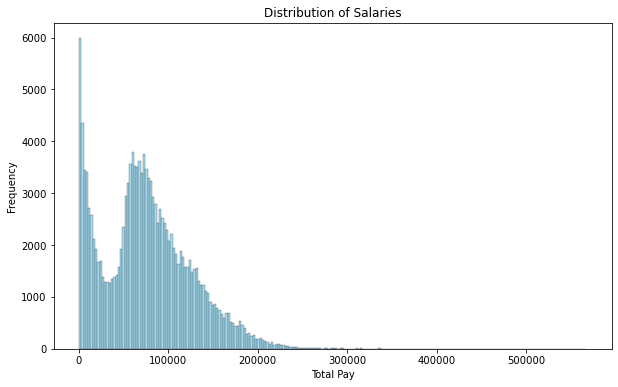

In [16]:
# visualize the distribution of salaries
plt.figure(figsize=(10,6))
sns.histplot(df["TotalPay"], color="skyblue")
plt.title("Distribution of Salaries")
plt.xlabel("Total Pay")
plt.ylabel("Frequency")
plt.show()

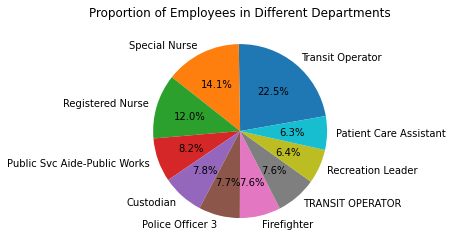

In [17]:
# pie charts to represent the proportion of employees in different Jops
values = df["JobTitle"].value_counts()[:10]
plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=10)
plt.title("Proportion of Employees in Different Departments")
plt.show()

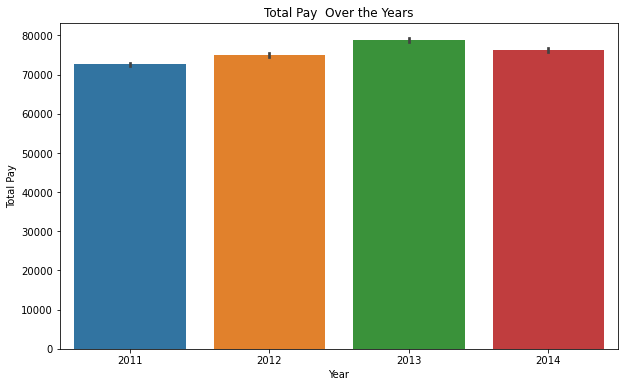

In [18]:
plt.figure(figsize=(10, 6))

sns.barplot(x="Year", y="TotalPay", data=df)
plt.xlabel('Year')
plt.ylabel("Total Pay")
plt.title("Total Pay  Over the Years")

plt.show()

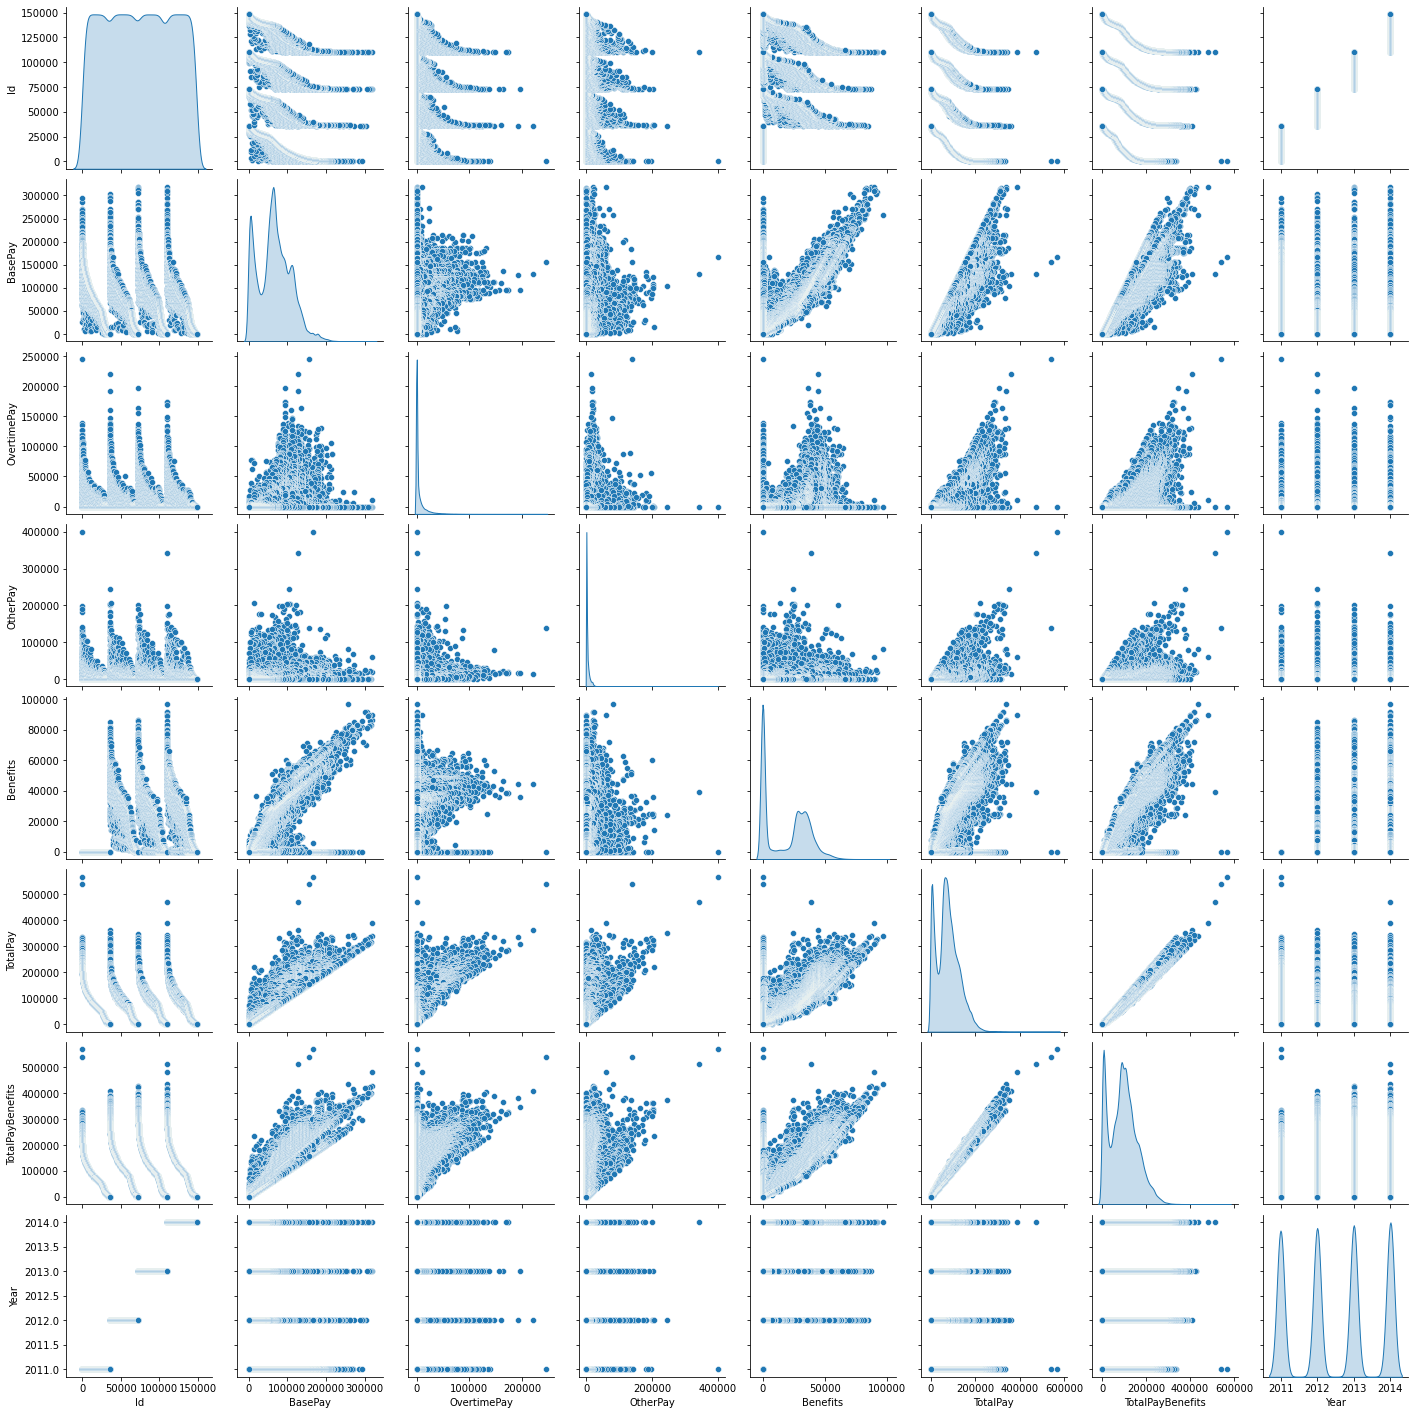

In [19]:
# show distribution each column and correlation with other columns  
sns.pairplot(data=df,diag_kind="kde");

# 5-Grouped Analysis

In [23]:
# Group the data by Year and compare the average salaries across different groups

group_by_year = df.groupby("Year")[["BasePay", "OvertimePay", "OtherPay", "TotalPay", "TotalPayBenefits"]].mean().reset_index()
group_by_year

,Year,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011,64400.991170,4585.995895,3608.473545,72595.460609,72595.460609
1,2012,66212.629578,5079.317575,3636.335804,74928.282957,101673.802160
2,2013,69631.069053,5368.577324,3811.008327,78810.654705,102942.460196
3,2014,67316.721920,5463.032069,3499.974803,76279.728792,101329.827838


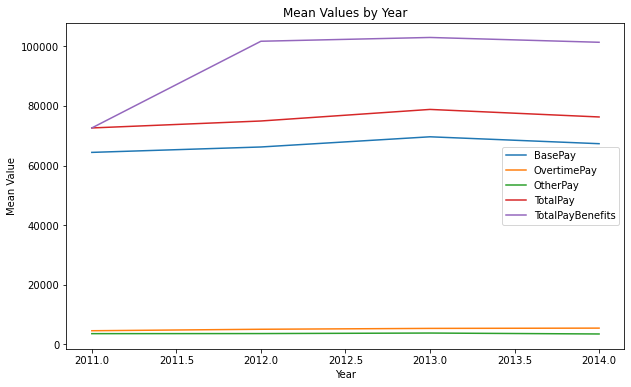

In [24]:
plt.figure(figsize=(10, 6))

# Plotting mean values for each year
for column in ["BasePay", "OvertimePay", "OtherPay", "TotalPay", "TotalPayBenefits"]:
    plt.plot(group_by_year["Year"], group_by_year[column], label=column)

plt.title('Mean Values by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

# 6-Simple Correlation Analysis

<AxesSubplot:>

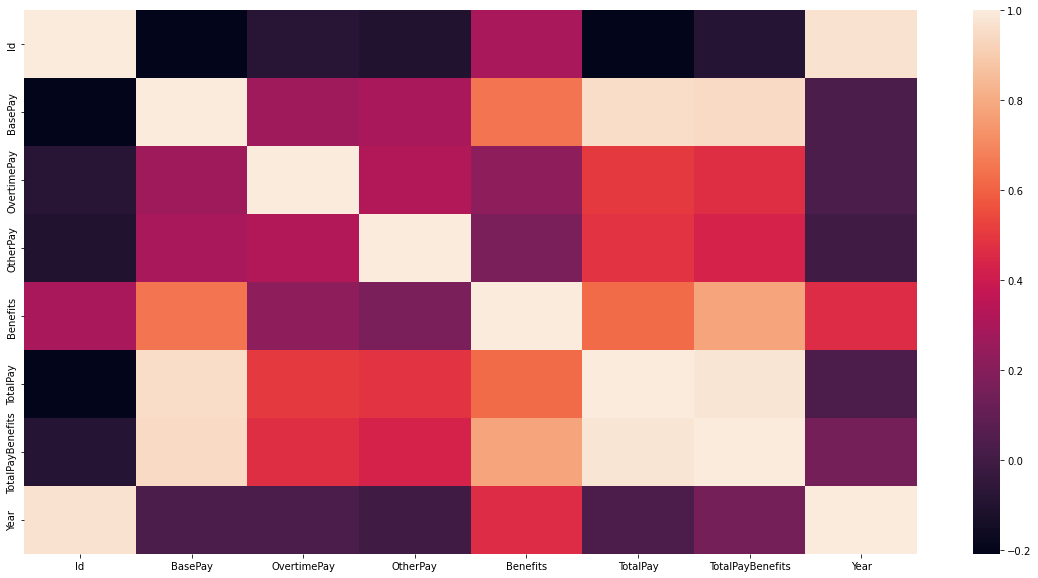

In [26]:
# plot the heatmap to show correlation between columns 
plt.figure(figsize=(20,10))
corr = df.select_dtypes("number").corr()
sns.heatmap(corr)

as shown there is correaltion between total pay and : (base pay, overtimepay, other pay )

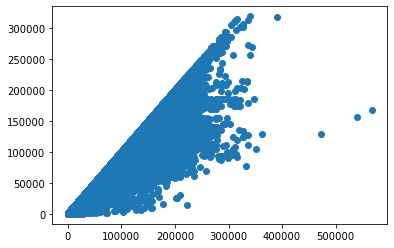

In [27]:
plt.scatter(df["TotalPay"], df["BasePay"]);